<a href="https://colab.research.google.com/github/Sant05hkumar06/Data-Science-Projects/blob/main/Classification_Model_for_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task: Develop a classification model for titanic survival prediction.

Download the data from https://www.kaggle.com/c/titanic/data and perform the following operations.

1. EDA (Univariate, Multivariate, KDE, Pearson Correlation)
2. Data Preprocessing (Imputation, create at least 2 new features)
3. Cross-validation
4. Use ROC curve, Precision/Recall for the model's metric (NOT ALLOWED TO USE ACCURACY)
5. An inference pipeline consisting of Data Preprocessing and prediction.


Note: It is mandatory to plot each graph and write an observation about it. Plot without title, x-label, and y-label won't be accepted.

### Importing Libraries

In [1]:
import pandas as pd
!pip install -U klib
import klib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
!pip install scikit-plot
import scikitplot as skplt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization,Dropout
import plotly.express as px

In [2]:
!pip install pyfiglet
import pyfiglet

In [3]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import missingno as mso

In [4]:
train = pd.read_csv('/content/sample_data/train (1).csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

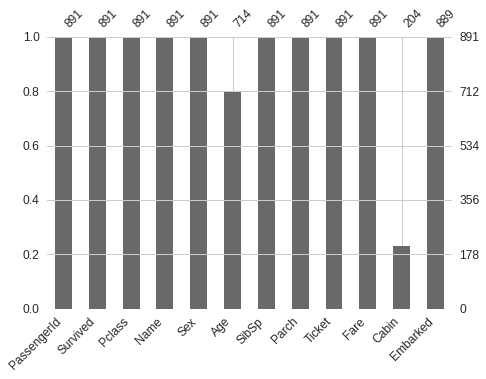

In [7]:
plt.figure(figsize = (16, 5))
ax_train = plt.subplot(1,2,2)
mso.bar(train, ax = ax_train, fontsize = 12)

In [8]:
train.isna().sum().sort_values(ascending=False).head(12)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

#### From this we can see the columns name which have many missing values like Cabin, Age & Embarked has 2 missing values

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### From upper function we can see the spread of our data like those who Survived has value of 1 and 0 for those who hva not survived, same with other it help to understand the spread of data

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In train data set, it can be seen the data type for each column. Also, there are some null values in specific columns.

### EDA
#### 1. Univariate Analysis

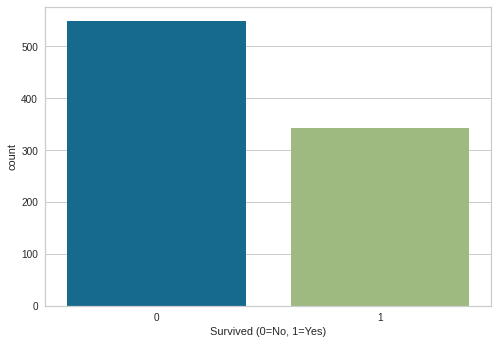

In [11]:
sns.countplot(x='Survived', data=train)
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

#### Obseravtions 

Fron above chart we can observe no. passengers survived & those who have not. It can be observed that most of the passengers have not survived.

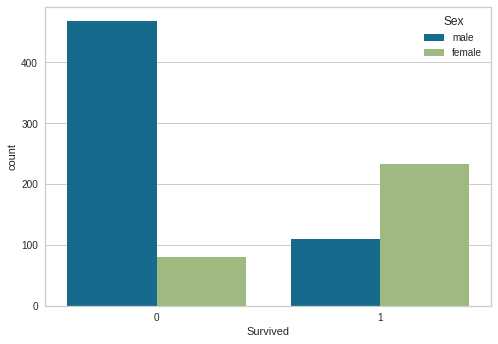

In [12]:
sns.countplot(x='Survived',hue='Sex', data=train)

#### Obseravtions 

Fron above chart we can observe no. of male & female passengers survived & those who have not. The Majority of survived are females & those who have not are males

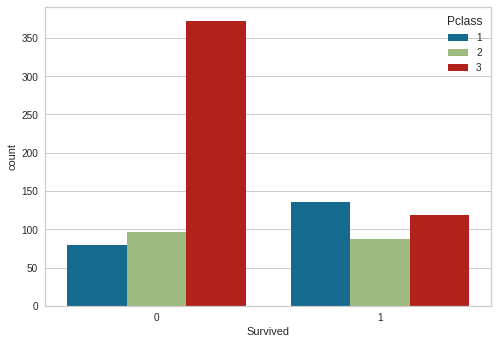

In [13]:
sns.countplot(x='Survived',hue='Pclass', data=train)

From this we can observe that no. of max. passengers who have not survived are from 3rd class & those who have survived are from 1st class

#### 2. Bivariate Analysis

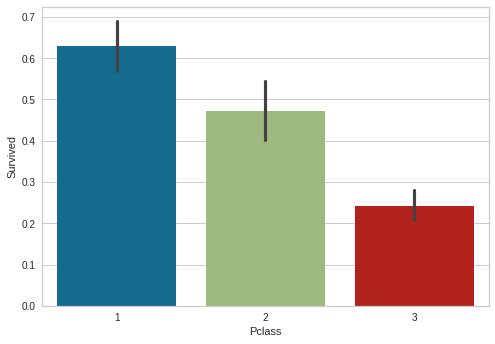

In [14]:
#visual representation of survival rate per Pclass
sns.barplot(x='Pclass',y='Survived',data=train)

From this also we can observe that no. of max. passengers who have not survived are from 3rd class & those who have survived are from 1st class

In [15]:
#survival rate based on sex 1=Female, 0=Male
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


From this table we can see that survival rate of female is higher than male

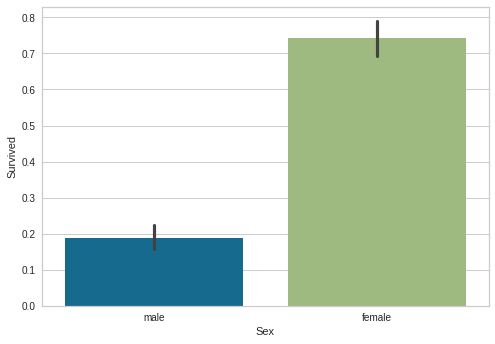

In [16]:
#Visual representation of survival rate
sns.barplot(x='Sex',y='Survived',data=train)

This is the graphical representation of above table & we can see that survival rate of female is higher than male

#### 3. Multivariate Analysis

Survival by Sex, Passenger Class and Embarking Port

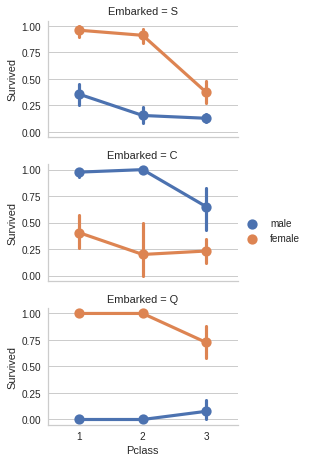

In [17]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

From above we can observe that males from embarked=C & females from embarked=S & Q of 1sy class has high survival rate

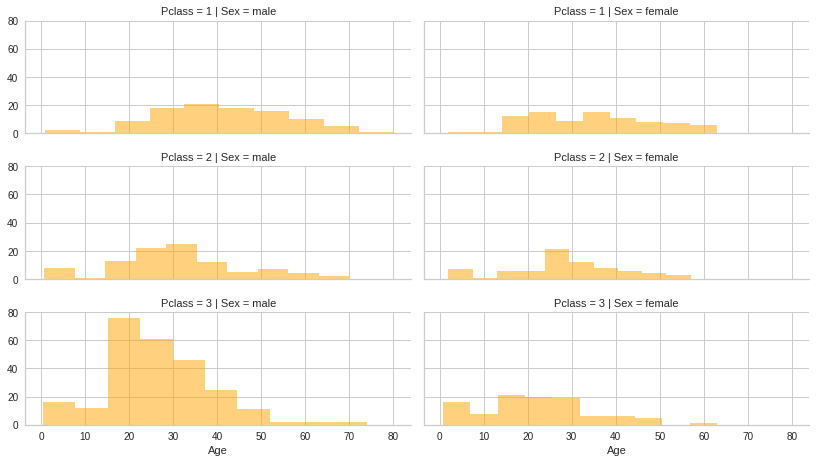

In [18]:
grid = sns.FacetGrid(train, row= 'Pclass', col= 'Sex', size = 2.2, aspect = 2.6)
grid.map(plt.hist, 'Age', alpha= .5, bins=10, color= 'orange')
plt.ylim((0,80))
grid.add_legend()

From above we can observe the no. of passengers of various ages travelling by different classes

**Checking Outliers**

In [19]:
def grab_col_names(dataframe, cat_th=5, car_th=20):
   cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
   num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and
                  dataframe[col].nunique() < cat_th]

   cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and
                   dataframe[col].nunique() > car_th]

   cat_cols = cat_cols + num_but_cat
   cat_cols = [col for col in cat_cols if col not in cat_but_car]
   num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and "ID" not in col.upper()]
   num_cols = [col for col in num_cols if col not in num_but_cat]

   return cat_cols,num_cols,cat_but_car

In [20]:
grab_col_names(train)

(['Sex', 'Embarked', 'Survived', 'Pclass'],
 ['Age', 'SibSp', 'Parch', 'Fare'],
 ['Name', 'Ticket', 'Cabin'])

In [21]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    Q1 = dataframe[col_name].quantile(q1)
    Q3 = dataframe[col_name].quantile(q3)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    
    return low_limit, up_limit

In [22]:
cat_cols, num_cols, cat_but_car = grab_col_names(train)

In [23]:
def check_outlier(dataframe, q1=0.25, q3=0.75):
    for col_name in num_cols:
        low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
        if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
            sns.boxplot(x=dataframe[col_name])
            plt.show()
        else:
            return False

In [24]:
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

**Skewness of Fare, SibSp, and Parch is high, square root transformation will be performed for test and training**

## Building Pipeline

## Treating Missing Values

In [25]:
class Preprocess_Missingvalues:
  def __init__(self):
    pass

  def fit(self,X,y=None):
    return self
    
  def transform(self,X):    
    X['Age']=X['Age'].fillna(X['Age'].median())
    X['Embarked']=X['Embarked'].transform(lambda x:x.fillna(x.mode()[0]))    
    X=X.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1)

    return X

Here am creating a class which can treat missing value as the value is from categorical column or from numerical column it will handle it and also droping some columns that are not useful like id it only represent the unique ids

## Feature Engineering

In [26]:
class Feature_Engineering:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self 
  def transform(self,X):
     X['FamilySize'] = X['SibSp'] + X['Parch'] + 1
     
     X['IsAlone'] = 0
     X.loc[X['FamilySize'] == 1, 'IsAlone'] = 1

     X.loc[ X['Age'] <= 16, 'Age'] = 0
     X.loc[(X['Age'] > 16) & (X['Age'] <= 36), 'Age'] = 1
     X.loc[(X['Age'] > 36) & (X['Age'] <= 50), 'Age'] = 2
     X.loc[(X['Age'] > 50) & (X['Age'] <= 64), 'Age'] = 3
     X.loc[ X['Age'] > 64, 'Age'] = 4
     X['Age'] = X['Age'].astype(int) 

     X.loc[ X['Fare'] <= 7.91, 'Fare'] = 0
     X.loc[(X['Fare'] > 7.91) & (X['Fare'] <= 14.454), 'Fare'] = 1
     X.loc[(X['Fare'] > 14.454) & (X['Fare'] <= 31), 'Fare'] = 2
     X.loc[ X['Fare'] > 31, 'Fare'] = 3
     X['Fare'] = X['Fare'].astype(int)
     return X

## Encoding

In [27]:
class Encoding:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    le=LabelEncoder()
    cols= ('Sex', 'Embarked')
    for c in cols:
      X[c]=le.fit_transform(X[c])

      
    return X

## Removing Skewness

In [28]:
class skewness_remove:
  def __init__(self):
    pass
  
  def fit(self,X,y=None):
    return self

  def transform(self,X):
    X.Fare = np.sqrt(X.Fare)
    X.SibSp = np.sqrt(X.SibSp)
    X.Parch = np.sqrt(X.Parch)
    return X

**Feature Scaling**

In [29]:
class Feature_Scaling:
  def __init__(self):
    pass
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    x=X.copy()
    scale=MinMaxScaler()
    X=scale.fit_transform(X)
    X=pd.DataFrame(X,columns=x.columns)
    return X

Square root transformation performed for removing skewness

In [30]:
from sklearn.pipeline import Pipeline

## Pipeline For Machine Learning

In [31]:
pipe=Pipeline([
               ("Preprocess_Missingvalues",Preprocess_Missingvalues()),                       #Removing and treating missing values
               ("Feature_Engineering",Feature_Engineering()),                                 #Adding more columns
               ("skewness_remove",skewness_remove()),                                         #Removing Skewness  
               ("Encoding",Encoding()),                                                       #Feature transformation converting all the categorical columns into numerical             
               ("Feature_Scaling",Feature_Scaling())                                                       
               ])

In [32]:
X=train.drop(['Survived'],axis=1)
y=train['Survived']

Separating data into X and Y for ML

In [33]:
X_new=pipe.fit_transform(X)

In [34]:
X_new.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1.0,1.0,0.25,0.353553,0.000000,0.000000,1.0,0.1,0.0
1,0.0,0.0,0.50,0.353553,0.000000,1.000000,0.0,0.1,0.0
2,1.0,0.0,0.25,0.000000,0.000000,0.577350,1.0,0.0,1.0
3,0.0,0.0,0.25,0.353553,0.000000,1.000000,1.0,0.1,0.0
4,1.0,1.0,0.25,0.000000,0.000000,0.577350,1.0,0.0,1.0
5,1.0,1.0,0.25,0.000000,0.000000,0.577350,0.5,0.0,1.0
6,0.0,1.0,0.75,0.000000,0.000000,1.000000,1.0,0.0,1.0
7,1.0,1.0,0.00,0.612372,0.408248,0.816497,1.0,0.4,0.0
8,1.0,0.0,0.25,0.000000,0.577350,0.577350,1.0,0.2,0.0
9,0.5,0.0,0.00,0.353553,0.000000,0.816497,0.0,0.1,0.0


In [35]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    float64
 1   Sex         891 non-null    float64
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    float64
 7   FamilySize  891 non-null    float64
 8   IsAlone     891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


In [36]:
X_new.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
dtype: int64

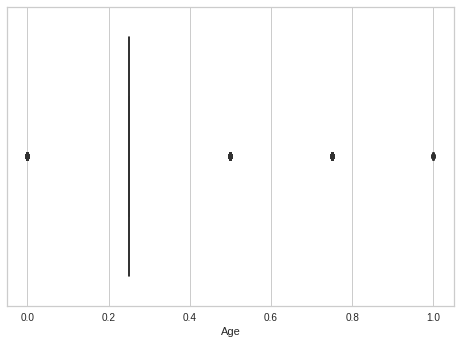

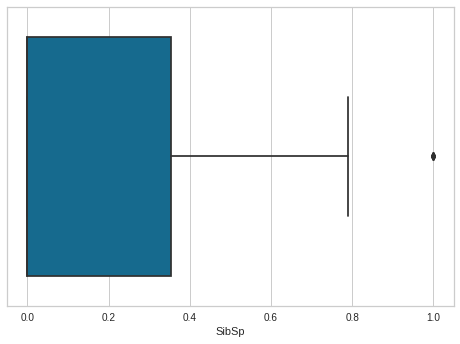

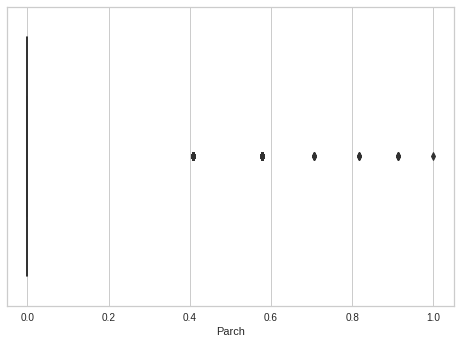

False

In [37]:
check_outlier(X_new)

If we examine the upper and lower limit values for variables and consider them from this point of view, we can recheck outliers by replacing q1 value as 0.05 and q3 value as 0.95.

In the following steps, we will examine whether the variables together form an outlier by using Local Outlier Factor (LOF).

In [38]:
check_outlier(X_new, q1=0.05, q3=0.95)

False

## Checking multicollinearity

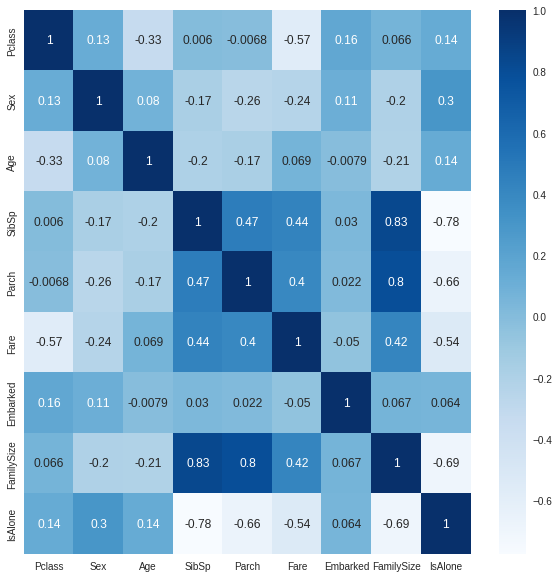

In [39]:
X_corr=X_new.corr()

plt.figure(figsize=(10,10))
sns.heatmap(X_corr,annot=True, cmap='Blues')

By heatmap, we can find no feature is hihly correlated also this code will help me to understand the which feature is highly correlated to each other

In [40]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname=corr_matrix.columns[i]
        print(corr_matrix.iloc[i,j],corr_matrix.columns[i],corr_matrix.columns[j])
        col_corr.add(colname)
        return col_corr

In [41]:
corr_features=correlation(X_new,0.90)

By this also we can observe no feature is correlated

#### Spliting data into train and test

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

**SMOTE Technique**

Since the number of not survived passengers is more than survived passengers, oversampling is carried out to avoid overfitting

In [43]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

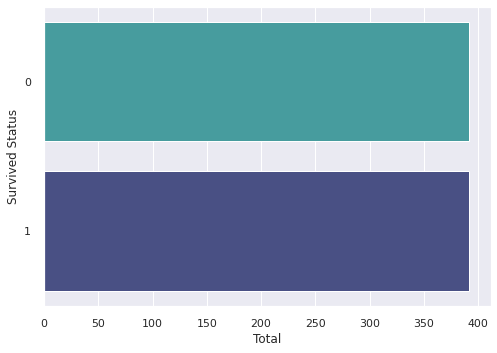

In [44]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=train, palette="mako_r")
plt.ylabel('Survived Status')
plt.xlabel('Total')
plt.show()

## Training Multiple Models

In [45]:
models={
    "Logistic Regression":LogisticRegression(),
    "KNN or k-Nearest Neighbors":KNeighborsClassifier(),
    "Naive Bayes classifier":GaussianNB(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forrest":RandomForestClassifier(),    
    "XGB  Classifier" :XGBClassifier(),
    "LGBM  Classifier":LGBMClassifier()
    }

 _                _     _   _      
| |    ___   __ _(_)___| |_(_) ___ 
| |   / _ \ / _` | / __| __| |/ __|
| |__| (_) | (_| | \__ \ |_| | (__ 
|_____\___/ \__, |_|___/\__|_|\___|
            |___/                  
 ____                              _             
|  _ \ ___  __ _ _ __ ___  ___ ___(_) ___  _ __  
| |_) / _ \/ _` | '__/ _ \/ __/ __| |/ _ \| '_ \ 
|  _ <  __/ (_| | | |  __/\__ \__ \ | (_) | | | |
|_| \_\___|\__, |_|  \___||___/___/_|\___/|_| |_|
           |___/                                 

ACCURACY SCORE 0.8059701492537313


Cross Val Score 79.57064842131693


Confusion metrics
[[124  33]
 [ 19  92]]


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       157
           1       0.74      0.83      0.78       111

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.81      0.81      0.81       268



Confusion Matrix


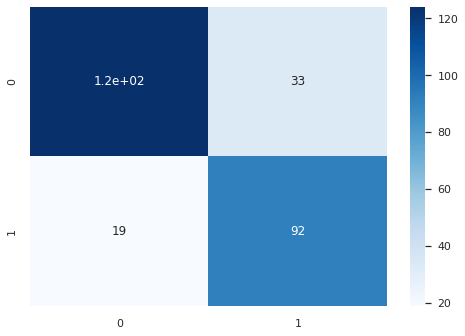

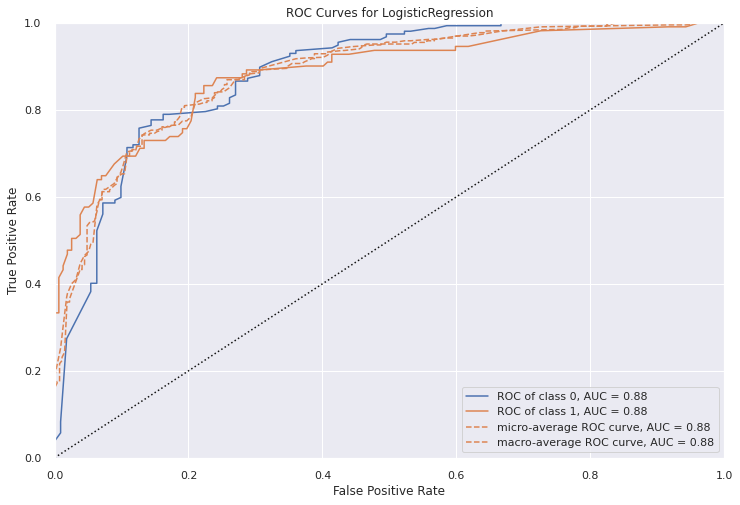

Model Learning Curve


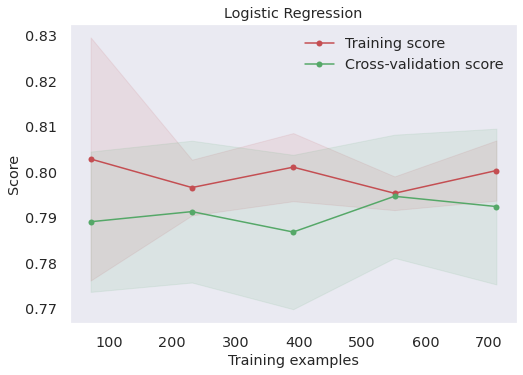

 _  ___   _ _   _                _         _   _                          _   
| |/ / \ | | \ | |   ___  _ __  | | __    | \ | | ___  __ _ _ __ ___  ___| |_ 
| ' /|  \| |  \| |  / _ \| '__| | |/ /____|  \| |/ _ \/ _` | '__/ _ \/ __| __|
| . \| |\  | |\  | | (_) | |    |   <_____| |\  |  __/ (_| | | |  __/\__ \ |_ 
|_|\_\_| \_|_| \_|  \___/|_|    |_|\_\    |_| \_|\___|\__,_|_|  \___||___/\__|
                                                                              
 _   _      _       _     _                    
| \ | | ___(_) __ _| |__ | |__   ___  _ __ ___ 
|  \| |/ _ \ |/ _` | '_ \| '_ \ / _ \| '__/ __|
| |\  |  __/ | (_| | | | | |_) | (_) | |  \__ \
|_| \_|\___|_|\__, |_| |_|_.__/ \___/|_|  |___/
              |___/                            

ACCURACY SCORE 0.7723880597014925


Cross Val Score 78.6730274307953


Confusion metrics
[[124  33]
 [ 28  83]]


Classification Report
              precision    recall  f1-score   support

           0       0.82      0.79      0.80   

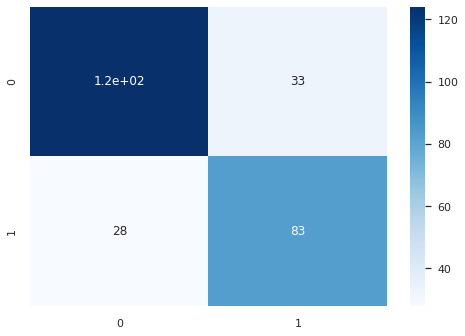

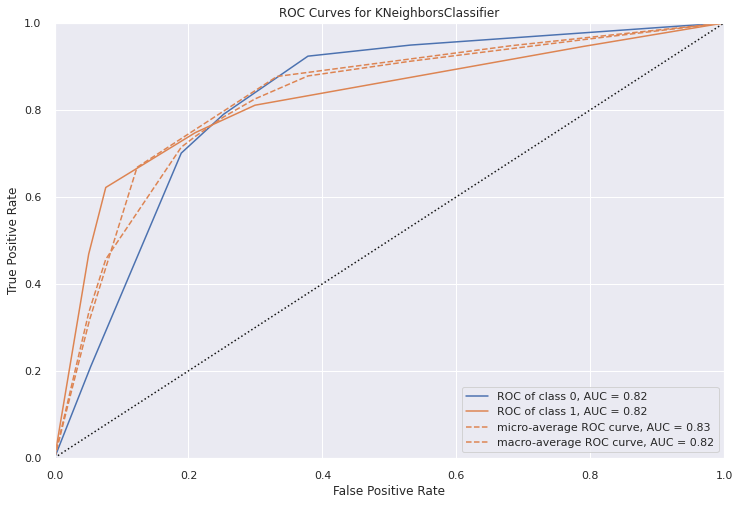

Model Learning Curve


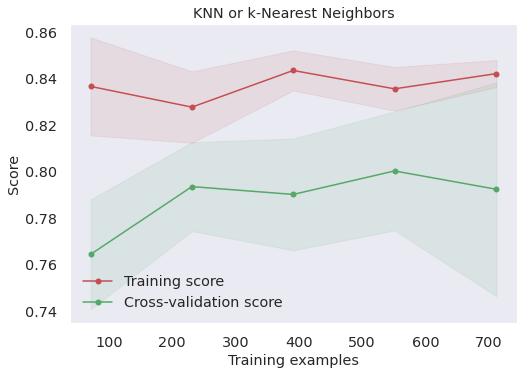

 _   _       _             ____                        
| \ | | __ _(_)_   _____  | __ )  __ _ _   _  ___  ___ 
|  \| |/ _` | \ \ / / _ \ |  _ \ / _` | | | |/ _ \/ __|
| |\  | (_| | |\ V /  __/ | |_) | (_| | |_| |  __/\__ \
|_| \_|\__,_|_| \_/ \___| |____/ \__,_|\__, |\___||___/
                                       |___/           
      _               _  __ _           
  ___| | __ _ ___ ___(_)/ _(_) ___ _ __ 
 / __| |/ _` / __/ __| | |_| |/ _ \ '__|
| (__| | (_| \__ \__ \ |  _| |  __/ |   
 \___|_|\__,_|___/___/_|_| |_|\___|_|   
                                        

ACCURACY SCORE 0.8097014925373134


Cross Val Score 77.21674722239659


Confusion metrics
[[118  39]
 [ 12  99]]


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       157
           1       0.72      0.89      0.80       111

    accuracy                           0.81       268
   macro avg       0.81      0.82      0.81       268
weighted

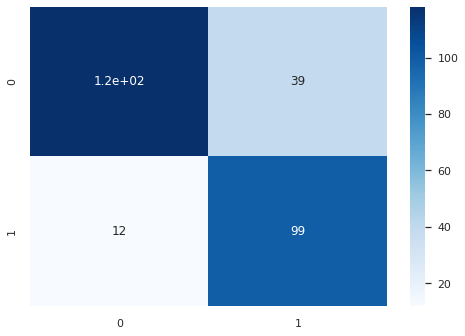

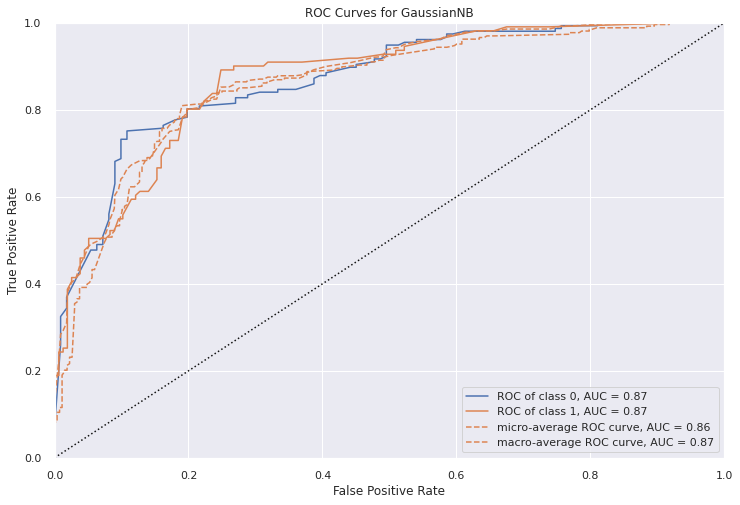

Model Learning Curve


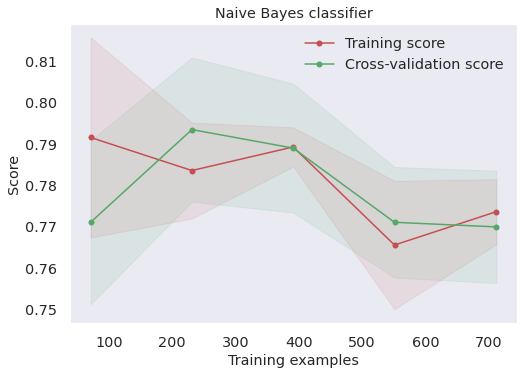

 ____            _     _               _____              
|  _ \  ___  ___(_)___(_) ___  _ __   |_   _| __ ___  ___ 
| | | |/ _ \/ __| / __| |/ _ \| '_ \    | || '__/ _ \/ _ \
| |_| |  __/ (__| \__ \ | (_) | | | |   | || | |  __/  __/
|____/ \___|\___|_|___/_|\___/|_| |_|   |_||_|  \___|\___|
                                                          

ACCURACY SCORE 0.7686567164179104


Cross Val Score 80.2479442596196


Confusion metrics
[[128  29]
 [ 33  78]]


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.73      0.70      0.72       111

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



Confusion Matrix


Roc Auc Curve


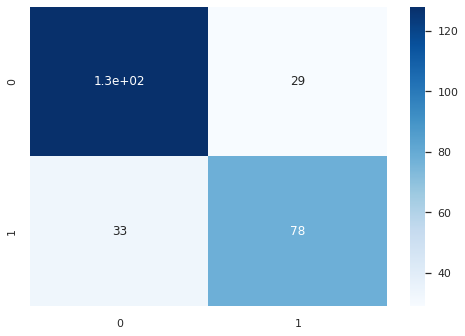

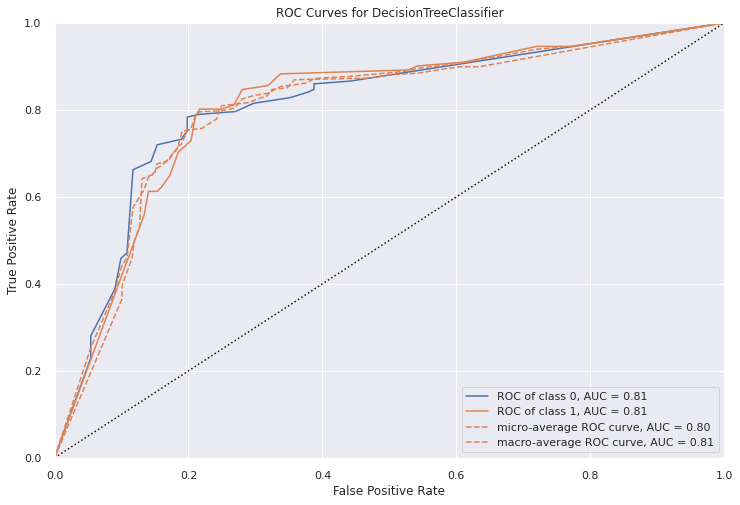

Model Learning Curve


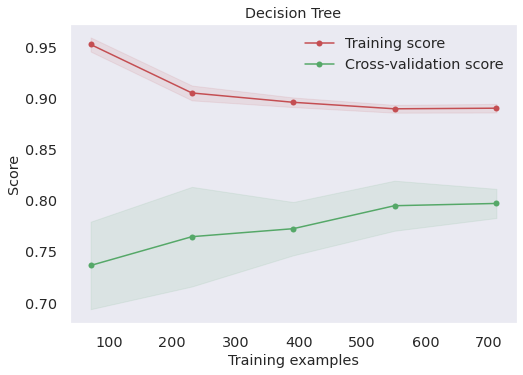

 ____                 _                   _____                        _   
|  _ \ __ _ _ __   __| | ___  _ __ ___   |  ___|__  _ __ _ __ ___  ___| |_ 
| |_) / _` | '_ \ / _` |/ _ \| '_ ` _ \  | |_ / _ \| '__| '__/ _ \/ __| __|
|  _ < (_| | | | | (_| | (_) | | | | | | |  _| (_) | |  | | |  __/\__ \ |_ 
|_| \_\__,_|_| |_|\__,_|\___/|_| |_| |_| |_|  \___/|_|  |_|  \___||___/\__|
                                                                           

ACCURACY SCORE 0.7835820895522388


Cross Val Score 81.47824995292197


Confusion metrics
[[132  25]
 [ 33  78]]


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.76      0.70      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



Confusion Matrix


Roc Auc Curve


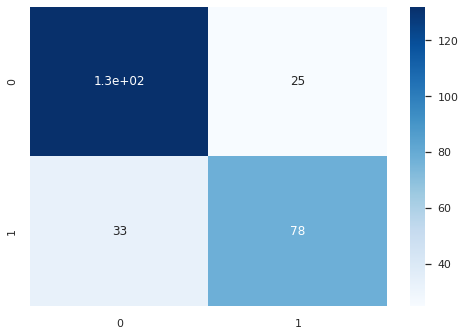

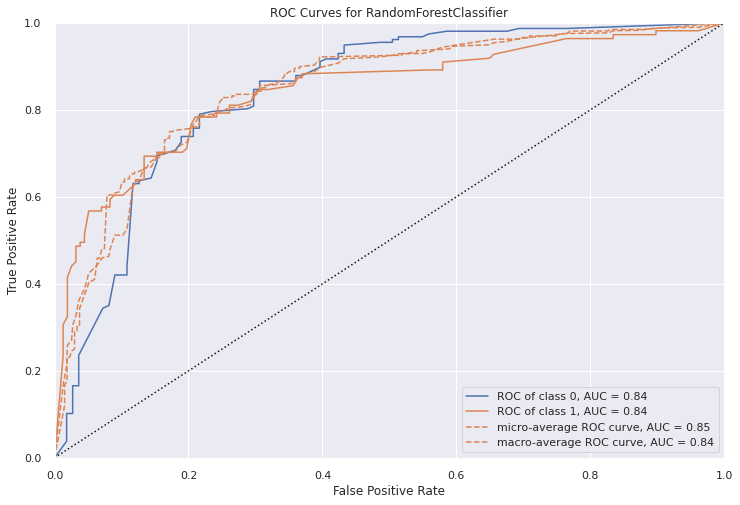

Model Learning Curve


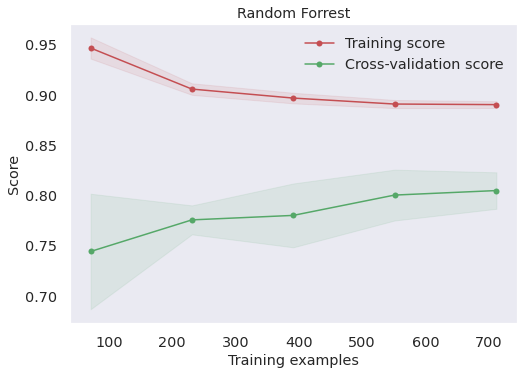

__  ______ ____      ____ _               _  __ _           
\ \/ / ___| __ )    / ___| | __ _ ___ ___(_)/ _(_) ___ _ __ 
 \  / |  _|  _ \   | |   | |/ _` / __/ __| | |_| |/ _ \ '__|
 /  \ |_| | |_) |  | |___| | (_| \__ \__ \ |  _| |  __/ |   
/_/\_\____|____/    \____|_|\__,_|___/___/_|_| |_|\___|_|   
                                                            

ACCURACY SCORE 0.8059701492537313


Cross Val Score 81.59123721047017


Confusion metrics
[[135  22]
 [ 30  81]]


Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



Confusion Matrix


Roc Auc Curve


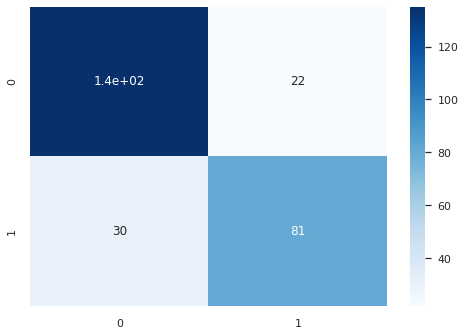

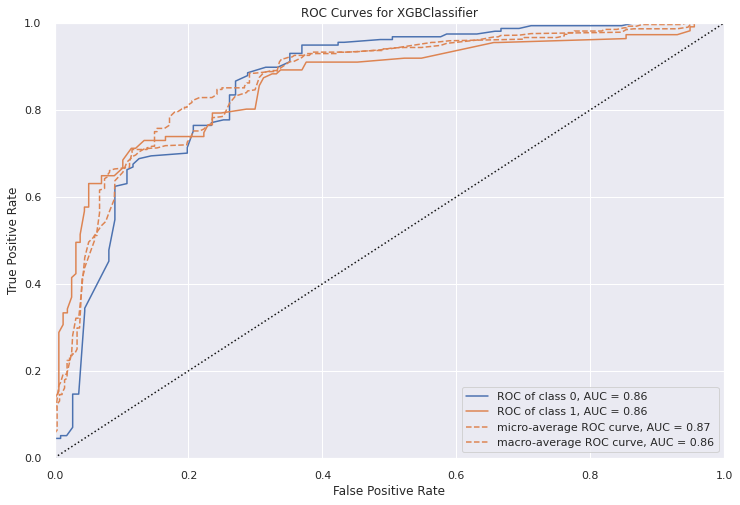

Model Learning Curve


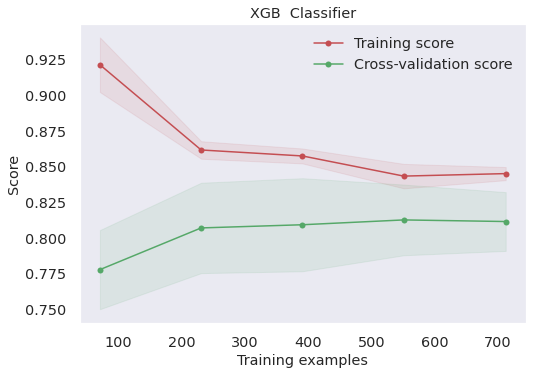

 _     ____ ____  __  __     ____ _               _  __ _           
| |   / ___| __ )|  \/  |   / ___| | __ _ ___ ___(_)/ _(_) ___ _ __ 
| |  | |  _|  _ \| |\/| |  | |   | |/ _` / __/ __| | |_| |/ _ \ '__|
| |__| |_| | |_) | |  | |  | |___| | (_| \__ \__ \ |  _| |  __/ |   
|_____\____|____/|_|  |_|   \____|_|\__,_|___/___/_|_| |_|\___|_|   
                                                                    

ACCURACY SCORE 0.7985074626865671


Cross Val Score 82.38277572029376


Confusion metrics
[[134  23]
 [ 31  80]]


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



Confusion Matrix


Roc Auc Curve


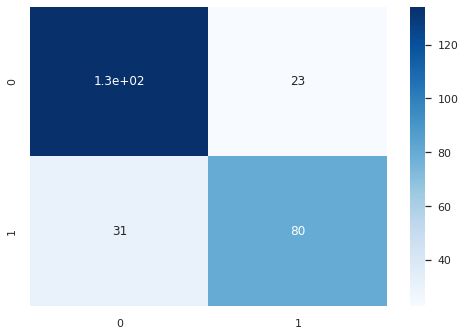

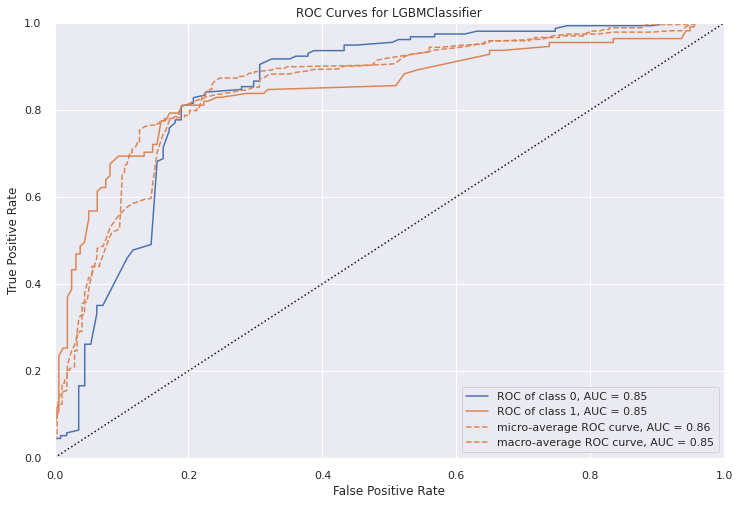

Model Learning Curve


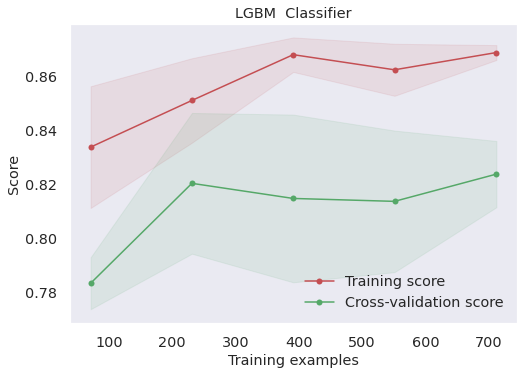

In [46]:
NAME=[]
CVS=[]
ACCURACY_SCORE=[]
skf=StratifiedKFold(n_splits=5,shuffle=True)
for name,model in models.items():
  NAME.append(name)
  font=pyfiglet.figlet_format(name)
  print(font)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  ACCURACY_SCORE.append(accuracy)
  print("ACCURACY SCORE",accuracy)
  cvs=cross_val_score(model,X_new,y,scoring='accuracy',cv=skf).mean()
  CVS.append(cvs)
  print("\n")
  print("Cross Val Score",cvs*100)
  cm=confusion_matrix(y_test,y_pred)
  print("\n")
  print("Confusion metrics")
  print(cm)
  report=classification_report(y_test,y_pred)
  print("\n")
  print("Classification Report")
  print(report)
  print("\n")
  print("Confusion Matrix")
  cmatrix=confusion_matrix(y_test,y_pred)
  sns.heatmap(cmatrix,annot=True, cmap='Blues')
  print("\n") 
  print("Roc Auc Curve")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=["0","1"],micro=True,macro=True)
  print("Model Learning Curve")
  skplt.estimators.plot_learning_curve(model,X_new,y,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

In [47]:
models_result=pd.DataFrame({
    "NAME":NAME,
    "Cross_Val_Score":CVS,
})

In [48]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [49]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=10)
GB.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [50]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=20, n_estimators=200)
0.834355728659526
{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 5}
8


              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.77      0.68      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

[[134  23]
 [ 35  76]]
Roc Auc Curve


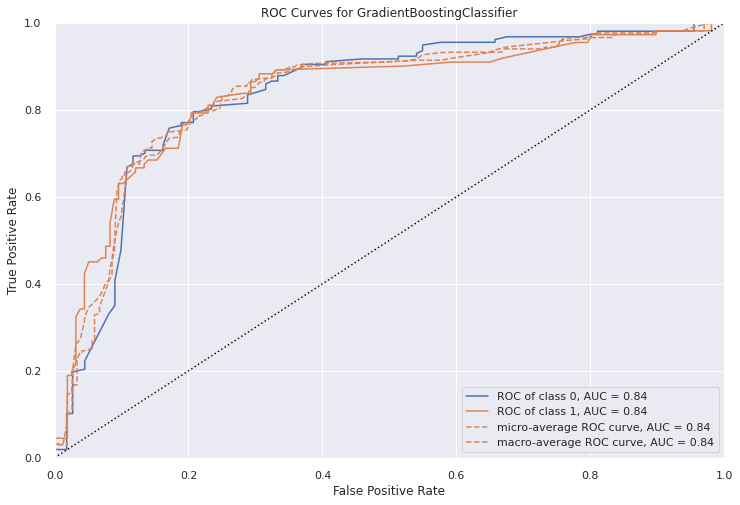

Model Learning Curve


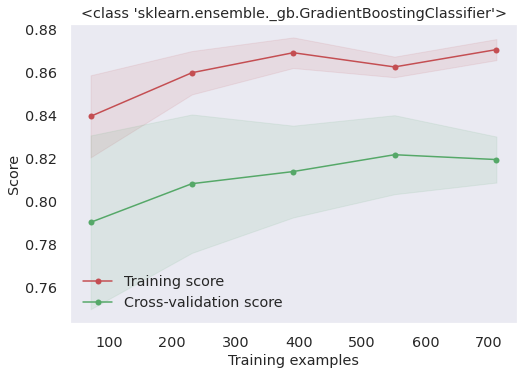

In [51]:
GBclassifier = GradientBoostingClassifier(n_estimators=400, max_depth=3, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Roc Auc Curve")
plt.figure(figsize=(12,8))
roc_auc(GBclassifier,X_train,y_train,X_test=X_test,y_test=y_test,classes=["0","1"],micro=True,macro=True)
print("Model Learning Curve")
skplt.estimators.plot_learning_curve(model,X_new,y,cv=skf,scoring='accuracy',text_fontsize='large',title=GradientBoostingClassifier)
plt.show()

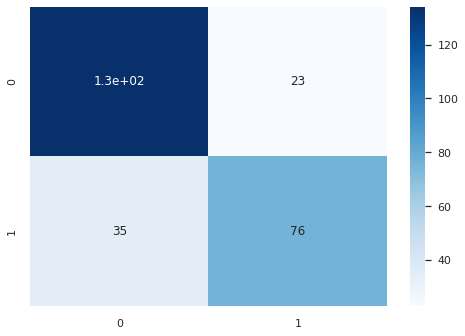

In [52]:
cmatrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cmatrix,annot=True, cmap='Blues')

In [53]:
models_result

,NAME,Cross_Val_Score
0,Logistic Regression,0.795706
1,KNN or k-Nearest Neighbors,0.786730
2,Naive Bayes classifier,0.772167
3,Decision Tree,0.802479
4,Random Forrest,0.814782
5,XGB Classifier,0.815912
6,LGBM Classifier,0.823828


From above models_result table, LGBM Classifier is giving good cross validation score. So, I choose LGBM Classifier as the best model

In [54]:
model = Sequential()

model.add(Dense(9, activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dense(90, activation='relu'))
model.add(Dense(180, activation='relu'))
model.add(Dense(360, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [55]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=4,epochs=400)

Epoch 1/400
196/196 [==============================] - 2s 6ms/step - loss: 0.5694 - val_loss: 0.5640
Epoch 2/400
196/196 [==============================] - 1s 4ms/step - loss: 0.5181 - val_loss: 0.4775
Epoch 3/400
196/196 [==============================] - 1s 4ms/step - loss: 0.4959 - val_loss: 0.5891
Epoch 4/400
196/196 [==============================] - 1s 4ms/step - loss: 0.4935 - val_loss: 0.5013
Epoch 5/400
196/196 [==============================] - 1s 4ms/step - loss: 0.4892 - val_loss: 0.5984
Epoch 6/400
196/196 [==============================] - 1s 4ms/step - loss: 0.4756 - val_loss: 0.4818
Epoch 7/400
196/196 [==============================] - 1s 4ms/step - loss: 0.4760 - val_loss: 0.4777
Epoch 8/400
196/196 [==============================] - 1s 4ms/step - loss: 0.4711 - val_loss: 0.4974
Epoch 9/400
196/196 [==============================] - 1s 4ms/step - loss: 0.4698 - val_loss: 0.4493
Epoch 10/400
196/196 [==============================] - 1s 4ms/step - loss: 0.4723 - val_lo

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (4, 9)                    90        
                                                                 
 dense_1 (Dense)             (4, 25)                   250       
                                                                 
 dense_2 (Dense)             (4, 90)                   2340      
                                                                 
 dense_3 (Dense)             (4, 180)                  16380     
                                                                 
 dense_4 (Dense)             (4, 360)                  65160     
                                                                 
 dense_5 (Dense)             (4, 90)                   32490     
                                                                 
 dense_6 (Dense)             (4, 1)                    9

In [57]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.77      0.68      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

[[134  23]
 [ 35  76]]


In [58]:
model = XGBClassifier(seed=0, nthread=1, n_estimators=2500, use_label_encoder=False, verbosity=0)
model = model.fit(X_train, y_train,verbose=False)
predictions_XG = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       157
           1       0.78      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

[[135  22]
 [ 35  76]]
Roc Auc Curve


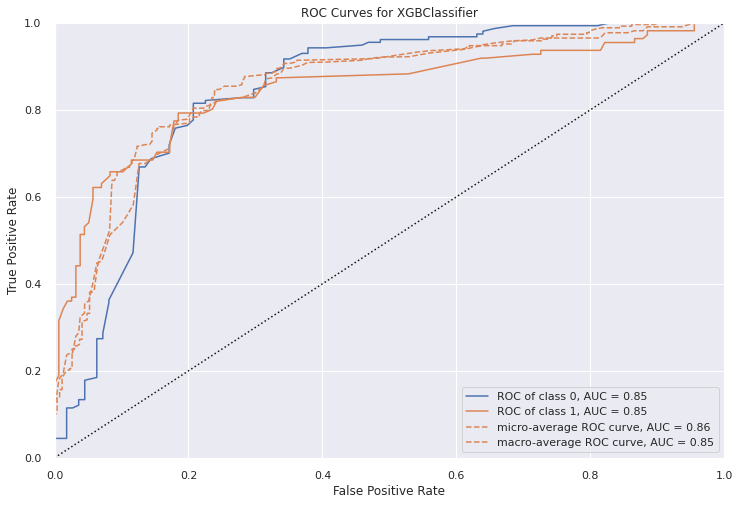

Model Learning Curve


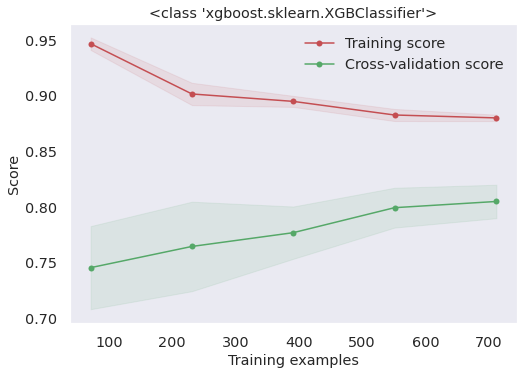

In [59]:
print(classification_report(y_test, predictions_XG))
print(confusion_matrix(y_test, predictions_XG ))
print("Roc Auc Curve")
plt.figure(figsize=(12,8))
roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=["0","1"],micro=True,macro=True)
print("Model Learning Curve")
skplt.estimators.plot_learning_curve(model,X_new,y,cv=skf,scoring='accuracy',text_fontsize='large',title=XGBClassifier)
plt.show()

## Hyperparameter tuning

In [62]:
lgb_model=LGBMClassifier()
lgb_model.fit(X_train,y_train)
lgb_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [63]:
param={
    'boosting_type': ['gbdt','dart'],
    'n_estimators':[100,200,500],
    'importance_type': ['split','gain'],
    'max_depth': [-1,1,2,3]
}

In [65]:
GRID=GridSearchCV(estimator=lgb_model,scoring='roc_auc',param_grid=param,n_jobs=-1,cv=skf)

In [66]:
GRID.fit(X_test,y_test)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'importance_type': ['split', 'gain'],
                         'max_depth': [-1, 1, 2, 3],
                         'n_estimators': [100, 200, 500]},
             scoring='roc_auc')

In [67]:
GRID.best_score_

0.8819596296060181

In [68]:
GRID.best_params_

{'boosting_type': 'dart',
 'importance_type': 'split',
 'max_depth': 2,
 'n_estimators': 100}

In [69]:
GRID.fit(X_test,y_test)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'importance_type': ['split', 'gain'],
                         'max_depth': [-1, 1, 2, 3],
                         'n_estimators': [100, 200, 500]},
             scoring='roc_auc')

In [70]:
GRID.best_score_

0.8744188687364529

In [72]:
y_pred= lgb_model.predict(X_test)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [74]:
print(confusion_matrix(y_test,y_pred))

[[134  23]
 [ 31  80]]


## Saving Model

In [75]:
import joblib
joblib.dump(lgb_model,"Classification Model for Titanic Dataset.obj")

['Classification Model for Titanic Dataset.obj']

Loading Model

In [76]:
model=joblib.load('/content/Classification Model for Titanic Dataset.obj')